Histogram (NumPy): [489, 221, 249, 261, 265, 339, 326, 429, 457, 527, 573, 682, 691, 710, 728, 817, 843, 881, 834, 821, 840, 687, 707, 674, 715, 630, 589, 575, 540, 558, 524, 522, 497, 537, 493, 499, 531, 553, 527, 522, 499, 503, 436, 444, 430, 406, 395, 396, 389, 382, 378, 352, 365, 333, 330, 306, 332, 317, 343, 295, 313, 316, 311, 320, 273, 330, 264, 281, 282, 240, 288, 259, 309, 268, 259, 274, 263, 254, 242, 256, 263, 253, 280, 263, 261, 260, 256, 268, 257, 225, 261, 244, 236, 205, 236, 227, 237, 237, 215, 238, 215, 230, 223, 222, 225, 227, 222, 249, 199, 222, 227, 237, 193, 234, 225, 219, 235, 232, 242, 201, 255, 219, 221, 219, 201, 247, 216, 218, 219, 177, 225, 252, 266, 228, 216, 253, 248, 227, 222, 220, 221, 217, 237, 250, 268, 228, 237, 247, 247, 263, 263, 235, 263, 288, 275, 299, 333, 330, 352, 382, 388, 405, 415, 422, 437, 440, 452, 491, 548, 505, 526, 438, 454, 437, 417, 385, 344, 388, 328, 369, 324, 322, 305, 318, 290, 254, 288, 309, 260, 270, 271, 267, 252, 294, 352, 319, 

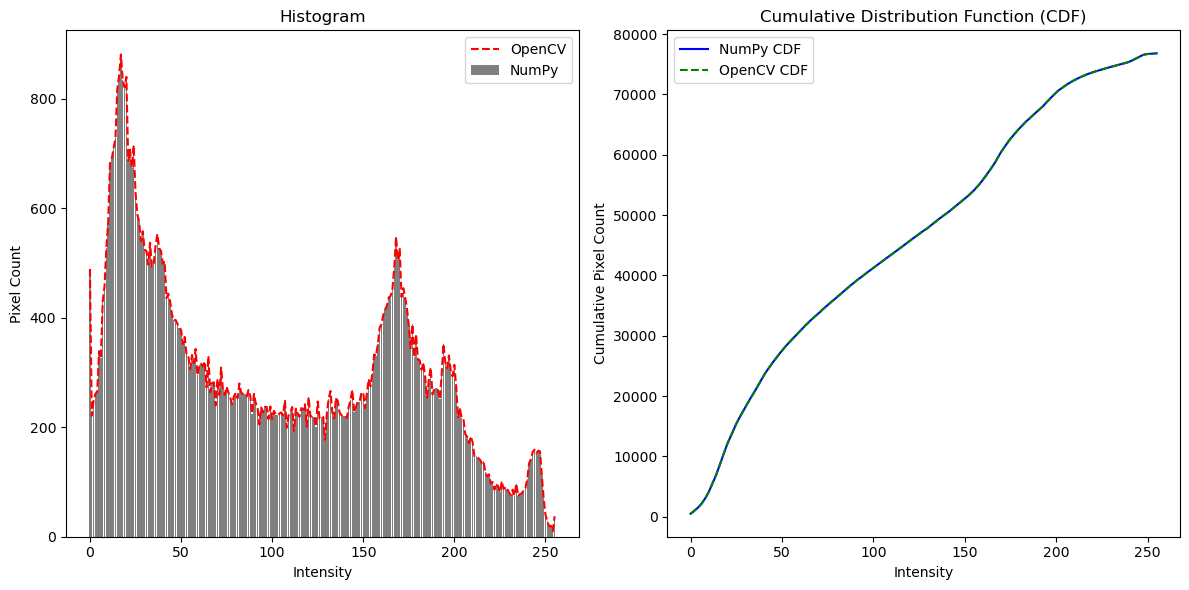

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image (convert to grayscale if necessary)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')

# Load the original image in grayscale
image = cv2.imread(image_path, 0)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Calculate histogram using NumPy
hist_np, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

# Calculate CDF manually using NumPy
cdf_np = hist_np.cumsum()

# Normalize the CDF
cdf_np_normalized = cdf_np * 255 / cdf_np[-1]

# Print histogram and CDF (NumPy)
print("Histogram (NumPy):", hist_np.tolist())
print("CDF (NumPy):", cdf_np.tolist())
print("Normalized CDF (NumPy):", cdf_np_normalized.tolist())




### 2. Compute Histogram and CDF Using OpenCV

# Calculate histogram using OpenCV
hist_cv = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

# Calculate CDF using OpenCV
cdf_cv = hist_cv.cumsum()

# Normalize the CDF
cdf_cv_normalized = cdf_cv * 255 / cdf_cv[-1]

# Print histogram and CDF (OpenCV)
print("Histogram (OpenCV):", hist_cv.tolist())
print("CDF (OpenCV):", cdf_cv.tolist())
print("Normalized CDF (OpenCV):", cdf_cv_normalized.tolist())

### 3. Visualize the Results

# Plot the Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Histogram')
plt.bar(range(256), hist_np, color='gray', label='NumPy')
plt.plot(hist_cv, color='red', linestyle='--', label='OpenCV')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')

# Plot the CDF
plt.subplot(1, 2, 2)
plt.title('Cumulative Distribution Function (CDF)')
plt.plot(cdf_np, label='NumPy CDF', color='blue')
plt.plot(cdf_cv, label='OpenCV CDF', color='green', linestyle='--')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Cumulative Pixel Count')

plt.tight_layout()
plt.show()


In [6]:
hist_cv[0:2]

array([489., 221.], dtype=float32)

In [7]:
cdf_cv[0:2]

array([489., 710.], dtype=float32)

In [20]:
cdf_cv[-1]

76800.0

In [21]:
cdf_cv_normalized[0:2]

array([1.6236328, 2.3574219], dtype=float32)

In [27]:
cdf_cv[0]/(cdf_cv[-1])*255

1.6236328077502549

In [28]:
cdf_cv[1]/(cdf_cv[-1])*255

2.3574217641726136